<a href="https://colab.research.google.com/github/yudisdc1/Portofolio/blob/main/Distance%20Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kelompok C
Anggota Kelompok :


- Elsye Dianita Siahaan (Statistika – 2106725015)
- Kirono Dwi Saputro (Statistika – 2106656365)
- Medifa Puspaningrum (Statistika – 2106634944)
- Muhammad Hanif Pramudya Zamzami (Matematika – 2006487566)
- Yudistira Dwi Cahya (Statistika – 2006530942)
- Yumna Izzati (Statistika – 2106633191)





<center><h1><strong><font color="blue">Kasus</font></strong></h1></center>

Diberikan program serial k-NN untuk memprediksi (test) data menggunakan jarak Euclidean seperti dibawah ini.
Tugas anda adalah:

1. Bandingkan performa model dengan 3 rumus jarak lainnya: [Manhattan, Chebysev, dan Canberra]
2. Menggunakan Thread Programming dan-atau Pemrograman Parallel (10-fold CV seperti contoh serial) tingkatkan efisiensi waktu code dibawah. Gunakan 1 cell terpisah agar bisa di cek via "terminal" sebagaimana yang kita lakukan di kuliah.

## Import modul


In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import matplotlib.cm as cm, time
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
plt.style.use('bmh'); sns.set()

"Done"

'Done'

In [ ]:
try: # Try Local Load
    train = pd.read_csv('data/KompStat-HPDS-case-train.csv')
    test = pd.read_csv('data/KompStat-HPDS-case-test.csv')
except: # Download data from taudata GitHub (dijalankan di Google Colab)
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataid/eLearning/master/data/KompStat-HPDS-case-train.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataid/eLearning/master/data/KompStat-HPDS-case-test.csv
    # Anda juga bisa unduh data dengan menggunakan URL diatas.
    train = pd.read_csv('data/KompStat-HPDS-case-train.csv')
    test = pd.read_csv('data/KompStat-HPDS-case-test.csv')
print(train.shape, test.shape)
print(train.info())
train.head()

(250, 3) (250, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      250 non-null    float64
 1   x2      250 non-null    float64
 2   y       250 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 6.0 KB
None


,x1,x2,y
0,-0.835291,3.576690,0
1,1.323524,4.229088,0
2,-1.373580,2.729440,3
3,0.852342,2.603071,0
4,3.321460,2.198889,0


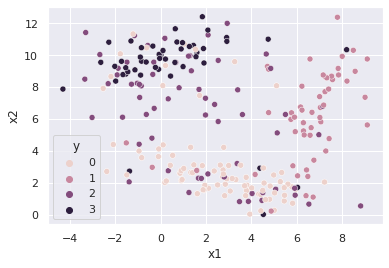

In [ ]:
p = sns.scatterplot(x=train.x1, y=train.x2, hue = train.y)

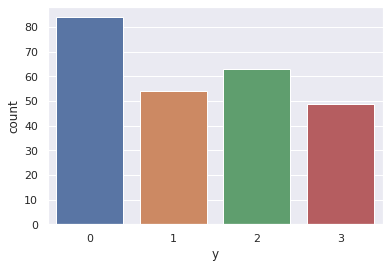

In [ ]:
p= sns.countplot(x=train.y)

In [ ]:
def getNeighbour(data, observasi, k):
    data['distance'] = 0.0
    for idx, dt in data.iterrows():
        data.at[idx, 'distance'] = distance.minkowski(dt[['x1','x2']], observasi[['x1','x2']], 2)
    data.sort_values(by=['distance'], inplace=True, ascending=True)
    data = data.head(k)
    return data

In [ ]:
# Serial Code
k = 5
cross_validasi = 10
hasil = {'waktu':[], 'label':[]}
akurasi = []
for cv in range(cross_validasi):
    mulai = time.time()
    prediksi = []
    for i, d in test.iterrows():
        tetangga = getNeighbour(train, d, k)
        prediksi.append(tetangga.y.mode().values[0])
    waktu = time.time() - mulai
    akurasi.append(accuracy_score(test.y.tolist(), prediksi))
    hasil['waktu'].append(waktu)
    hasil['label'].append('serial')

print("Rata-rata akurasi = {}, Variansi Akurasi = {}".format(np.mean(akurasi), np.var(akurasi)), flush=True)
# Catatan: karena "test data" tidak berubah di setiap iterasi, maka akurasi tidak perlu masuk ke variabel "hasil"
hasil = pd.DataFrame(hasil)
hasil.head()

Rata-rata akurasi = 0.716, Variansi Akurasi = 0.0


,waktu,label
0,67.059685,serial
1,60.126693,serial
2,54.913540,serial
3,54.256702,serial
4,55.893432,serial


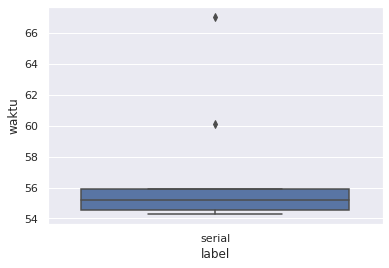

In [ ]:
p = sns.boxplot(y="waktu", x="label", data=hasil)

# **Chebyshev**

In [ ]:
def getNeighbour_chebyshev(data, observasi, k):
    data['distance'] = 0.0
    for idx, dt in data.iterrows():
        data.at[idx, 'distance'] = distance.chebyshev(dt[['x1','x2']], observasi[['x1','x2']])
    data.sort_values(by=['distance'], inplace=True, ascending=True)
    data = data.head(k)
    return data

In [ ]:
# Serial Code
k = 5
cross_validasi = 10
hasil = {'waktu':[], 'label':[]}
akurasi = []
for cv in range(cross_validasi):
    mulai = time.time()
    prediksi = []
    for i, d in test.iterrows():
        tetangga = getNeighbour_chebyshev(train, d, k)
        prediksi.append(tetangga.y.mode().values[0])
    waktu = time.time() - mulai
    akurasi.append(accuracy_score(test.y.tolist(), prediksi))
    hasil['waktu'].append(waktu)
    hasil['label'].append('serial')

print("Rata-rata akurasi = {}, Variansi Akurasi = {}".format(np.mean(akurasi), np.var(akurasi)), flush=True)
# Catatan: karena "test data" tidak berubah di setiap iterasi, maka akurasi tidak perlu masuk ke variabel "hasil"
hasil = pd.DataFrame(hasil)
hasil.head()

Rata-rata akurasi = 0.736, Variansi Akurasi = 0.0


,waktu,label
0,54.588079,serial
1,54.717190,serial
2,53.859364,serial
3,53.475361,serial
4,54.588940,serial


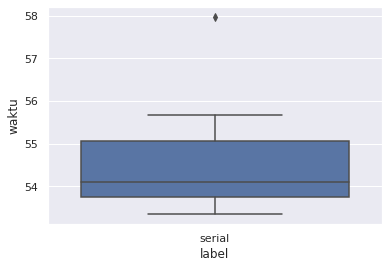

In [ ]:
p = sns.boxplot(y="waktu", x="label", data=hasil)

# **Canberra**

In [ ]:
def getNeighbour_canberra(data, observasi, k):
    data['distance'] = 0.0
    for idx, dt in data.iterrows():
        data.at[idx, 'distance'] = distance.canberra(dt[['x1','x2']], observasi[['x1','x2']])
    data.sort_values(by=['distance'], inplace=True, ascending=True)
    data = data.head(k)
    return data

In [ ]:
# Serial Code
k = 5
cross_validasi = 10
hasil = {'waktu':[], 'label':[]}
akurasi = []
for cv in range(cross_validasi):
    mulai = time.time()
    prediksi = []
    for i, d in test.iterrows():
        tetangga = getNeighbour_canberra(train, d, k)
        prediksi.append(tetangga.y.mode().values[0])
    waktu = time.time() - mulai
    akurasi.append(accuracy_score(test.y.tolist(), prediksi))
    hasil['waktu'].append(waktu)
    hasil['label'].append('serial')

print("Rata-rata akurasi = {}, Variansi Akurasi = {}".format(np.mean(akurasi), np.var(akurasi)), flush=True)
# Catatan: karena "test data" tidak berubah di setiap iterasi, maka akurasi tidak perlu masuk ke variabel "hasil"
hasil = pd.DataFrame(hasil)
hasil.head()

Rata-rata akurasi = 0.712, Variansi Akurasi = 0.0


,waktu,label
0,60.564088,serial
1,59.612310,serial
2,59.776500,serial
3,60.606184,serial
4,59.871587,serial


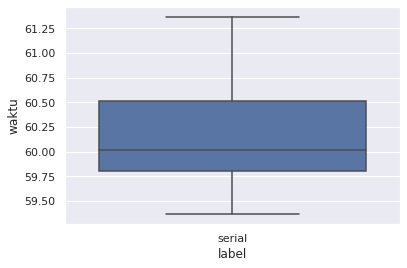

In [ ]:
p = sns.boxplot(y="waktu", x="label", data=hasil)

## **Manhattan**

In [ ]:
def getNeighbour_Manhattan(data, observasi, k):
    data['distance'] = 0.0
    for idx, dt in data.iterrows():
        data.at[idx, 'distance'] = distance.cityblock(dt[['x1','x2']], observasi[['x1','x2']], 2)
    data.sort_values(by=['distance'], inplace=True, ascending=True)
    data = data.head(k)
    return data

In [ ]:
# Serial Code
k = 5
cross_validasi = 10
hasil = {'waktu':[], 'label':[]}
akurasi = []
for cv in range(cross_validasi):
    mulai = time.time()
    prediksi = []
    for i, d in test.iterrows():
        tetangga = getNeighbour_Manhattan(train, d, k)
        prediksi.append(tetangga.y.mode().values[0])
    waktu = time.time() - mulai
    akurasi.append(accuracy_score(test.y.tolist(), prediksi))
    hasil['waktu'].append(waktu)
    hasil['label'].append('serial')

print("Rata-rata akurasi = {}, Variansi Akurasi = {}".format(np.mean(akurasi), np.var(akurasi)), flush=True)
# Catatan: karena "test data" tidak berubah di setiap iterasi, maka akurasi tidak perlu masuk ke variabel "hasil"
hasil = pd.DataFrame(hasil)
hasil.head()

Rata-rata akurasi = 0.708, Variansi Akurasi = 0.0


,waktu,label
0,57.411471,serial
1,61.677464,serial
2,64.178248,serial
3,62.458316,serial
4,63.049054,serial


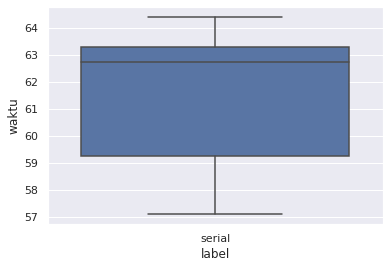

In [ ]:
p = sns.boxplot(y="waktu", x="label", data=hasil)

## Perbandingan Model

Dari hasil komputasi, didapat rata-rata akurasi tiap model:
- Minkowski = 0.716
- Chebyshev = 0.736
- Canberra = 0.712
- Manhattan = 0.708

Sehingga dapat diasumsikan Model Chebyshev merupakan model yang terbaik, sebab nilai akurasinya paling tinggi di antara model lainnya.

## Nomor 2

In [ ]:
def getNeighbour_chebyshev(data, observasi, k):
    data['distance'] = 0.0
    for idx, dt in data.iterrows():
        data.at[idx, 'distance'] = distance.chebyshev(dt[['x1','x2']], observasi[['x1','x2']])
    data.sort_values(by=['distance'], inplace=True, ascending=True)
    data = data.head(k)
    return data

def getNeighbour_canberra(data, observasi, k):
    data['distance'] = 0.0
    for idx, dt in data.iterrows():
        data.at[idx, 'distance'] = distance.canberra(dt[['x1','x2']], observasi[['x1','x2']])
    data.sort_values(by=['distance'], inplace=True, ascending=True)
    data = data.head(k)
    return data

def getNeighbour_Manhattan(data, observasi, k):
    data['distance'] = 0.0
    for idx, dt in data.iterrows():
        data.at[idx, 'distance'] = distance.cityblock(dt[['x1','x2']], observasi[['x1','x2']], 2)
    data.sort_values(by=['distance'], inplace=True, ascending=True)
    data = data.head(k)
    return data

In [ ]:
akurasi_cheb = []
akurasi_man = []
akurasi_can = []

def cv_cheb(fold = 10, k = 5):
  for cv in range(fold):
        prediksi = []
        for i, d in test.iterrows():
            tetangga = getNeighbour_chebyshev(train, d, k)
            prediksi.append(tetangga.y.mode().values[0])
        akurasi_cheb.append(accuracy_score(test.y.tolist(), prediksi))
  return akurasi_cheb

def cv_man(fold = 10, k = 5):
  for cv in range(fold):
        prediksi = []
        for i, d in test.iterrows():
            tetangga = getNeighbour_canberra(train, d, k)
            prediksi.append(tetangga.y.mode().values[0])
        akurasi_man.append(accuracy_score(test.y.tolist(), prediksi))
  return akurasi_man

def cv_can(fold = 10, k = 5):
  for cv in range(fold):
        prediksi = []
        for i, d in test.iterrows():
            tetangga = getNeighbour_Manhattan(train, d, k)
            prediksi.append(tetangga.y.mode().values[0])
        akurasi_can.append(accuracy_score(test.y.tolist(), prediksi))
  return akurasi_can

In [ ]:
from threading import Thread
if __name__ == "__main__":
        t1 = Thread(target =cv_cheb)
        t2 = Thread(target=cv_can)
        t3 = Thread(target =cv_man)
        start_time = time.time()
        t1.start()
        t1.join()
        end_time = time.time()
        print("Parallel time cheb=", end_time - start_time)
        start_time = time.time()
        t2.start()
        t2.join()
        end_time = time.time()
        print("Parallel time can=", end_time - start_time)
        start_time = time.time()
        t3.start()
        t3.join()
        end_time = time.time()
        print("Parallel time man=", end_time - start_time)

Parallel time cheb= 251.1995587348938
Parallel time can= 263.1873941421509
Parallel time man= 268.1729338169098


In [ ]:
print("Rata-rata akurasi cheb = {}, Variansi Akurasi cheb= {}".format(np.mean(akurasi_cheb), np.var(akurasi_cheb)), flush=True)
print("Rata-rata akurasi can = {}, Variansi Akurasi can= {}".format(np.mean(akurasi_can), np.var(akurasi_can)), flush=True)
print("Rata-rata akurasi man = {}, Variansi Akurasi man= {}".format(np.mean(akurasi_man), np.var(akurasi_man)), flush=True)

Rata-rata akurasi cheb = 0.736, Variansi Akurasi cheb= 0.0
Rata-rata akurasi can = 0.708, Variansi Akurasi can= 0.0
Rata-rata akurasi man = 0.712, Variansi Akurasi man= 0.0


## Kesimpulan Nomor 2

Dengan menggunakan 3 thread untuk masing-masing program distance, perbandingan dengan serial sebagai berikut ;

Didapat perbandingan runtime pada komputasi serial dan parallel :
* untuk distance cheb :268 (total runtime serial), 251.1995587348938 (total runtime parallel)
* untuk distance canberra :297 (total runtime serial),  263.1873941421509 (total runtime parallel)
* untuk distance manhattan :297(total runtime serial), 268.1729338169098 (total runtime parallel)